In [113]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
pd.set_option('display.max_columns', None)  # maks kolon  ve row
pd.set_option('display.max_rows', None)


test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


🏠 House Price Dataset Projesi 🏠

Bu projede, ev fiyatlarını tahmin etmek için çeşitli özelliklere sahip bir veri seti kullanıyoruz. Amacımız, evin bulunduğu konum, büyüklük, oda sayısı gibi faktörlere dayalı olarak ev fiyatlarını doğru bir şekilde tahmin edebilecek bir model geliştirmek. Veriyi analiz ederken, veri temizleme, öznitelik mühendisliği ve makine öğrenimi modellerini uygulayarak en iyi tahminleri elde etmeyi hedefliyoruz. Tahminleri yaparken, Gradient Boosting gibi güçlü algoritmalar kullanacağız ve modelin performansını optimize edeceğiz.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ29YRPvfB1aogiU4hDuudJ6M6rtjG9yCYTXheqUXYXeEy76a6-bxIjXSJMcC1NhY4KyP4&usqp=CAU'>

In [114]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [115]:
df = pd.concat([train, test], ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# EDA

In [117]:
import warnings
warnings.filterwarnings('ignore')

import ydata_profiling

#df.profile_report()

In [118]:
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


## Filling NaN Value and Droping

In [119]:
df.shape

(2919, 81)

In [120]:
# Satış türleri 
df.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth',
       nan], dtype=object)

In [121]:
df = df.dropna(subset=['SaleType']) # satış türü boş olan değerleri isliyoruz bizim  çünkü nan değer girilmiş

In [122]:
#MSZone
# İmar yapılacak bir yerin ayrıntılı bilgilerini içeren harita analamına geliyor 

# atalım 
df = df.dropna(subset=['MSZoning'], axis=0)
df['MSZoning'].isna().sum()


0

In [123]:
# Utilities: Mevcut hizmetler Elektrik, su, gaz ,Isıtma, soğutma, aydınlatma # çop topşama kanalizasyon ... 
df['Utilities'].unique()
#'AllPub': Tüm temel kamu hizmetlerinin (elektrik, su, gaz vb.) mevcut olduğu anlamına gelebilir.
#'NoSeWa': Kanalizasyon hizmetinin olmadığı anlamına gelebilir, diğer temel hizmetler mevcut olabilir.
df = df.dropna(subset=['Utilities'], axis=0)

In [124]:
df['Exterior1st'].unique() # dış cephe/kaplama 
# burada kapalamalar göre fiyat artabilir  daha daynaıklı daha estetik vs
df = df.dropna(subset=['Exterior1st'], axis=0)
df = df.dropna(subset=['Exterior2nd'], axis=0)

In [125]:
# Dış duvarda bulunan kaplamanın büyüküğü (taş ,tuğlavs)
df['MasVnrArea'].unique()
df=df.dropna(subset=['MasVnrArea'],axis=0)

In [126]:
df['GarageCars'].unique() # garajdaki araba sayisi  
df['GarageArea'].unique() # garajın alanını 
df = df.dropna(subset=['GarageCars'], axis=0)
df = df.dropna(subset=['GarageArea'], axis=0)

In [127]:
# Evin bodrum katındaki Tam Banyo sayisi 
df['BsmtFullBath'].unique()
df = df.dropna(subset=['BsmtFullBath'], axis=0)
# buda bodrum katındaki yarım banyo 
df = df.dropna(subset=['BsmtHalfBath'], axis=0)

In [128]:
# Evin işlevsel olup olmadığı yani  bakıma ihtiyaç duyum duymadığı anlamına gelir 
df['Functional'].unique()
df=df.dropna(subset=['Functional'],axis=0)

In [129]:
# Mutfak kalitesi ( tezgah cihazlar makinalar )
df['KitchenQual'].unique()
df=df.dropna(subset=['KitchenQual'],axis=0)

In [130]:
# Elektirik  ( pano , Sigorta  vs türü i)
df['Electrical'].unique()
df=df.dropna(subset=['Electrical'],axis=0)

In [131]:
# bodurm katının tülerini gösteriyor , ama bodrum yok seçenieğini katmamışlar bende No ekledim
df['BsmtQual'].unique()
# Boş BsmtQual değerlerine 'No' değerini atama
df['BsmtQual'] = df['BsmtQual'].fillna('No')

In [132]:
df['BsmtCond'].unique()
#, "BsmtCond" bodrum katının mevcut durumunu,
#"BsmtQual" ise bodrum katının genel kalitesini ve özelliklerini yansıtır.
df['BsmtCond'] = df['BsmtCond'].fillna('No')

In [133]:
# BsmtExposure  #  bodurm katının girişleri diyebiliriz
df['BsmtExposure'].unique()
df[df['BsmtExposure'].isna()].sample(5)
df=df.dropna(subset=['BsmtExposure'],axis=0)

In [134]:
#  bodrum katının 2 kısmı tamamlanmış mı 
df['BsmtFinType2'].unique()
df=df.dropna(subset=['BsmtFinType2'],axis=0)

### LotFrontage : evin arasının yola bakan kısmının büyük olması 
<img src='https://s3.ca-central-1.amazonaws.com/ehq-production-canada/88b2ef5e215d3f49b7e8c16d285e238ad8535931/original/1643915771/ffe184e18b10fa1311acc20838b59305_zone_image.png?1643915771'>

In [135]:
# Arka Sokak   
df['Alley'].unique() # boş veriler çok fazla var 
# Boş değerleri 'No' olarak doldurma
df['Alley'] = df['Alley'].fillna('No')  # boş olanların arkada sokakaları yok 

In [136]:
(df[df['GarageType']=='No'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [137]:
# GarageType -> Garaj türü kaç araçlık vs
df['GarageType'].unique()
df['GarageType'] = df['GarageType'].fillna('No') # garajı yok 
# garajın iç kaplama vs 
df['GarageFinish'] = df['GarageFinish'].fillna('No') # garajı yok 
# GarageQual kalite durumu
df['GarageQual'] = df['GarageQual'].fillna('No') # garajı yok 
# GarageCond fiziksel durumu
df['GarageCond'] = df['GarageCond'].fillna('No') # garajı yok 

# garjın inşa yılı 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0) # garajı yok 

In [138]:
# evin dış duvarında kullanılan kaplama  , kare kare duvarlar oluyor hani restoranlarda
df['MasVnrType'].unique()
df['MasVnrType'] = df['MasVnrType'].fillna('None') # no duvarkaplama 

<src img ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIiiXdigYiAXrxfOY4j1Rje1FpYv9u-srkCQ&s'>

In [139]:
# FireplaceQu Şömine durumu iyi mi 
df['FireplaceQu'].unique()
df['FireplaceQu'] = df['FireplaceQu'].fillna('None') # no şömine 

In [140]:
# Havuz kalitesi 
df['PoolQC'].unique()
df['PoolQC'] = df['PoolQC'].fillna('None') # no havuz 

In [141]:
# benzersiz ve ya eksta unsurlar ( asansör , tenis kortu , depo)
df.MiscFeature.unique() # 100 tanesinde tek var 
df['MiscFeature'] = df['MiscFeature'].fillna('None') # no eksta ozellik 

In [142]:
# Fence  çit - tür vs durum  
df['Fence'].unique()
df['Fence'] = df['Fence'].fillna('None') # no fence 

<Axes: xlabel='LotFrontage', ylabel='Count'>

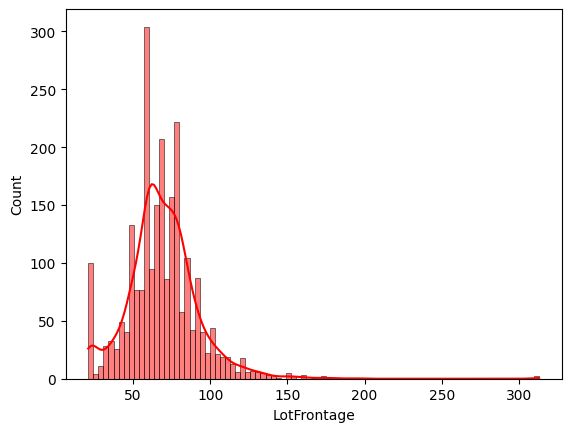

In [143]:
import seaborn as sns # LotFrontage - on cephe ile yol ile arasındaki mesafe 
sns.histplot(x=df['LotFrontage'],kde=True,color='red')

In [144]:
df['LotFrontage'].describe()

count    2340.000000
mean       69.126923
std        23.364203
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [145]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [146]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0


### Basit bir fiyat görselleştirme 

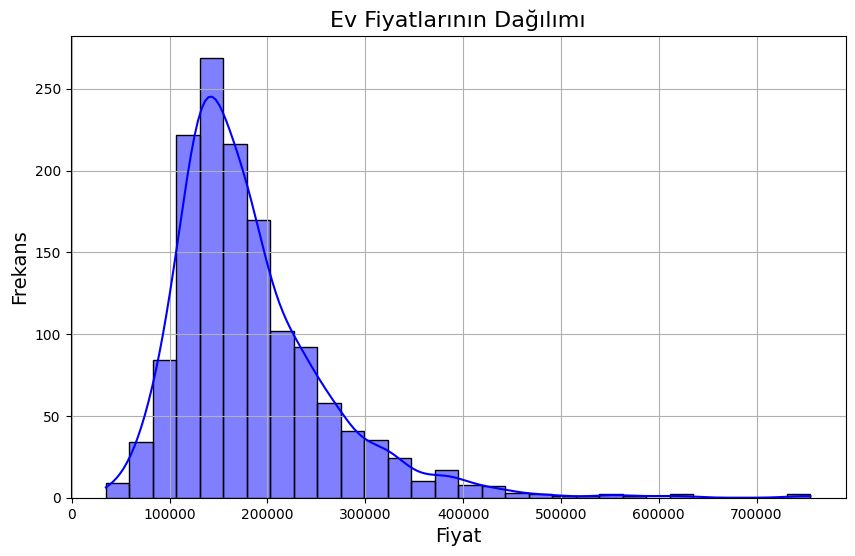

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Ev Fiyatlarının Dağılımı', fontsize=16)
plt.xlabel('Fiyat', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.grid(True)
plt.show()

# Modeling

In [167]:
df = pd.get_dummies(df, drop_first=True)

In [168]:
df_not_null = df[df['SalePrice'].notnull()]
df_null_price = df[df['SalePrice'].isnull()]

In [169]:

x=df_not_null.drop(['Id','SalePrice'],axis=1)
y=df_not_null[['SalePrice']]

In [170]:
x.shape,y.shape

((1412, 253), (1412, 1))

In [171]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
lr.fit(x_train,y_train)

LinearRegression()

In [172]:
prediction=lr.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(prediction,y_test)

0.725920601461046

In [173]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_predict=gb.predict(x_test)
r2_score(gb_predict,y_test)

0.8611482492107595

In [174]:
from regression_function import algo_test
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.710251e-01,2.978633e+04,1.732506e+04
XGBRegressor,7.970854e-01,3.736122e+04,2.009499e+04
KNeighborsRegressor,7.379163e-01,4.246044e+04,2.507832e+04
Ridge,6.778793e-01,4.707320e+04,2.003156e+04
Extra Tree,6.542623e-01,4.876832e+04,3.076984e+04
AdaBoost,6.539235e-01,4.879221e+04,3.131483e+04
Lasso,6.532211e-01,4.884169e+04,2.111243e+04
Linear,6.402625e-01,4.974589e+04,2.153966e+04
Decision Tree,6.164263e-01,5.136755e+04,3.007665e+04
ElasticNet,6.113438e-01,5.170675e+04,2.205074e+04


Text(0.5, 1.0, ' Feature İmportance ')

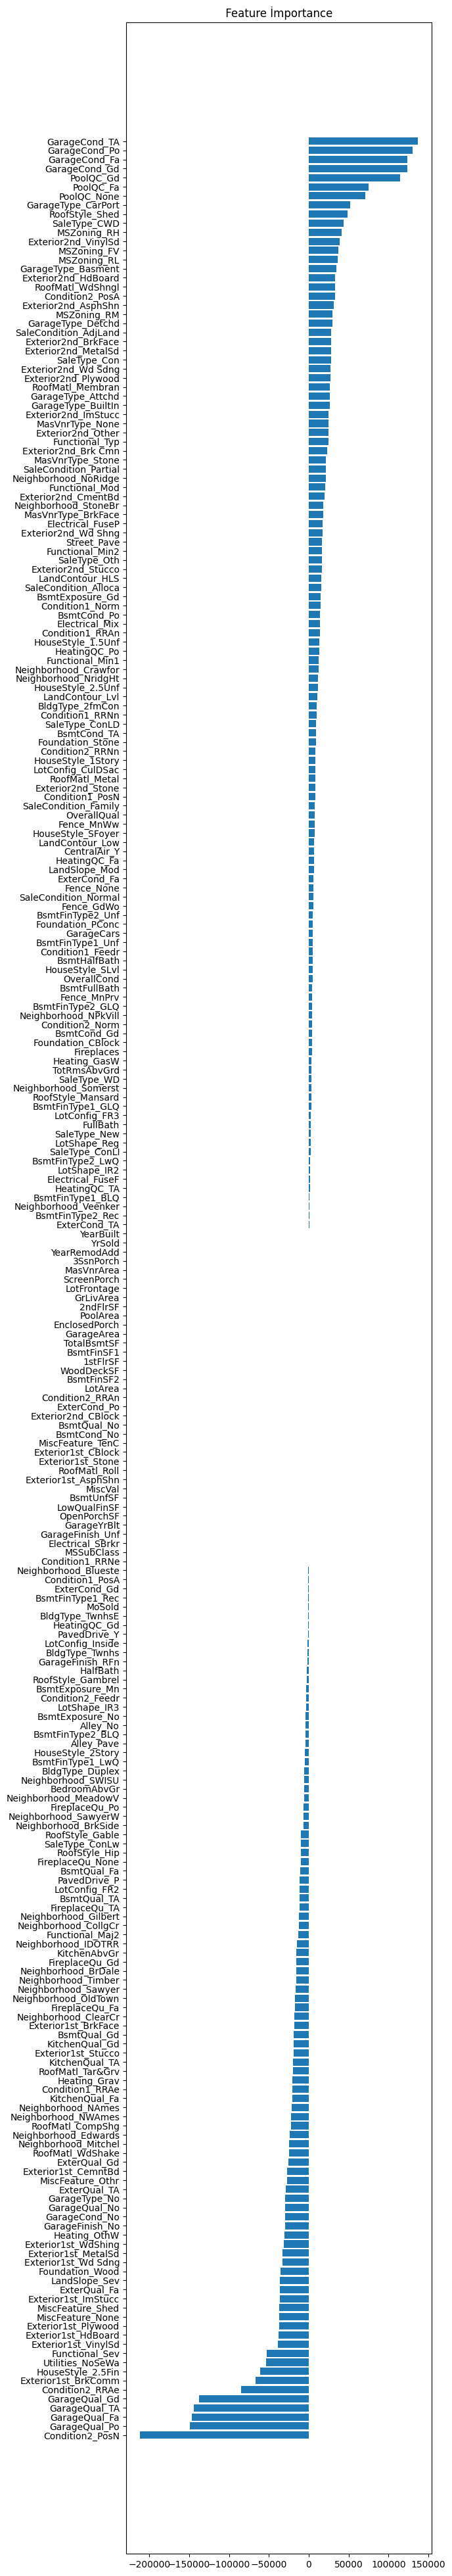

In [156]:
lr.coef_
feature_importance=pd.DataFrame({"Feature":x_test.columns,"Coefs":lr.coef_[0]})
feature_importance.head()
feature_importance=feature_importance.sort_values(by="Coefs",ascending=False)
feature_importance.head(7)  #  en büyükten en küçüğe doğru 

plt.figure(figsize=(6,50))
plt.barh(feature_importance.Feature,feature_importance.Coefs)
plt.gca().invert_yaxis()
plt.title(' Feature İmportance ')

In [157]:
abs(df_not_null.corr(numeric_only=True)['SalePrice']).sort_values(ascending=False)


SalePrice                1.000000
OverallQual              0.786765
GrLivArea                0.711080
GarageCars               0.641825
GarageArea               0.621095
1stFlrSF                 0.614753
TotalBsmtSF              0.611084
ExterQual_TA             0.587808
FullBath                 0.575604
TotRmsAbvGrd             0.545540
KitchenQual_TA           0.520673
YearBuilt                0.518736
YearRemodAdd             0.500266
Foundation_PConc         0.491727
BsmtQual_TA              0.486263
MasVnrArea               0.474525
FireplaceQu_None         0.466165
Fireplaces               0.462937
ExterQual_Gd             0.447556
BsmtFinType1_GLQ         0.425113
GarageFinish_Unf         0.409380
Neighborhood_NridgHt     0.395161
BsmtFinSF1               0.368849
MasVnrType_None          0.365035
Foundation_CBlock        0.360179
SaleType_New             0.353181
GarageType_Detchd        0.351682
SaleCondition_Partial    0.347487
FireplaceQu_Gd           0.333774
Neighborhood_N

<Axes: >

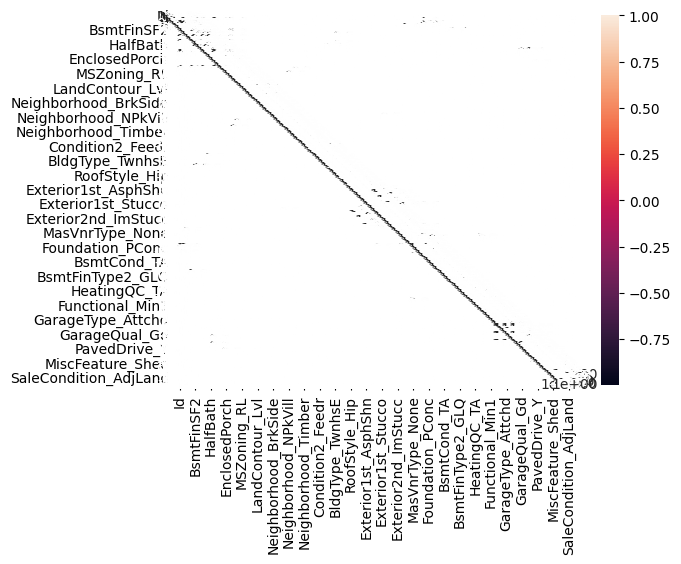

In [201]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.1')

In [158]:
atilacak_kolonlar = [
    "Fence_None",
    "RoofMatl_WdShngl",
    "Exterior1st_MetalSd",
    "BedroomAbvGr",
    "Neighborhood_Edwards",
    "Neighborhood_IDOTRR",
    "Exterior2nd_MetalSd",
    "Exterior1st_Wd Sdng",
    "Exterior2nd_Wd Sdng",
    "GarageFinish_RFn",
    "FireplaceQu_TA",
    "SaleCondition_Normal",
    "BsmtFinType1_Rec",
    "LotConfig_CulDSac",
    "Fence_MnPrv",
    "KitchenQual_Fa",
    "BsmtFinType1_BLQ",
    "GarageQual_Fa",
    "Neighborhood_Somerst",
    "Neighborhood_BrkSide",
    "HeatingQC_Gd",
    "BsmtQual_Fa",
    "EnclosedPorch",
    "Exterior1st_CemntBd",
    "Neighborhood_Sawyer",
    "Alley_No",
    "GarageCond_Fa",
    "Neighborhood_Timber",
    "Exterior2nd_CmentBd",
    "LotShape_IR2",
    "ExterCond_Fa",
    "LandContour_HLS",
    "Neighborhood_MeadowV",
    "Condition1_Feedr",
    "HeatingQC_Fa",
    "Condition1_Norm",
    "RoofMatl_CompShg",
    "ScreenPorch",
    "Electrical_FuseF",
    "Fence_GdWo",
    "KitchenAbvGr",
    "Neighborhood_BrDale",
    "Functional_Typ",
    "BldgType_Twnhs",
    "ExterCond_TA",
    "ExterQual_Fa",
    "Exterior1st_HdBoard",
    "HouseStyle_SFoyer",
    "BsmtFinType1_Unf",
    "Heating_Grav",
    "PoolQC_None",
    "PavedDrive_P",
    "OverallCond",
    "BldgType_2fmCon",
    "PoolArea",
    "HouseStyle_1.5Unf",
    "BsmtFinType1_LwQ",
    "MSZoning_FV",
    "BldgType_Duplex",
    "MSSubClass",
    "LotConfig_Inside",
    "FireplaceQu_Po",
    "BsmtCond_Gd",
    "Exterior2nd_ImStucc",
    "Exterior2nd_HdBoard",
    "Functional_Maj2",
    "Neighborhood_Crawfor",
    "Functional_Min2",
    "MiscFeature_Shed",
    "MSZoning_RH",
    "Neighborhood_SWISU",
    "GarageCond_Po",
    "Neighborhood_CollgCr",
    "MiscFeature_None",
    "BsmtFinType2_Unf",
    "Neighborhood_Veenker",
    "BsmtFinType2_BLQ",
    "GarageType_CarPort",
    "LandContour_Low",
    "Neighborhood_ClearCr",
    "Neighborhood_Mitchel",
    "BsmtCond_Po",
    "Functional_Min1",
    "ExterCond_Gd",
    "Fence_MnWw",
    "HouseStyle_1Story",
    "Exterior2nd_Plywood",
    "Condition2_Feedr",
    "Exterior1st_BrkFace",
    "SaleCondition_Family",
    "SaleType_ConLD",
    "Condition2_PosN",
    "Condition1_PosN",
    "Exterior1st_WdShing",
    "GarageQual_Po",
    "Condition2_PosA",
    "3SsnPorch",
    "LandSlope_Mod",
    "Exterior2nd_Other",
    "RoofMatl_WdShake",
    "BsmtFinType2_Rec",
    "Condition1_RRAe",
    "HouseStyle_SLvl",
    "Street_Pave",
    "GarageQual_Gd",
    "BsmtFinType2_LwQ",
    "MoSold",
    "SaleType_Con",
    "SaleCondition_AdjLand",
    "Condition1_PosA",
    "Exterior1st_BrkComm",
    "BsmtCond_TA",
    "Condition2_RRNn",
    "Exterior2nd_Stucco",
    "Neighborhood_NPkVill",
    "Exterior2nd_Brk Cmn",
    "Electrical_Mix",
    "BsmtExposure_Mn",
    "RoofStyle_Gambrel",
    "Electrical_FuseP",
    "SaleType_Oth",
    "Exterior1st_Stone",
    "Exterior2nd_BrkFace",
    "LotShape_IR3",
    "HouseStyle_2.5Fin",
    "ExterCond_Po",
    "Exterior2nd_Wd Shng",
    "Condition2_Norm",
    "Alley_Pave",
    "LandContour_Lvl",
    "GarageType_Basment",
    "HeatingQC_Po",
    "Neighborhood_Gilbert",
    "FireplaceQu_Fa",
    "SaleType_ConLw",
    "LowQualFinSF",
    "HouseStyle_2.5Unf",
    "Heating_OthW",
    "Exterior1st_ImStucc",
    "LandSlope_Sev",
    "Exterior2nd_CBlock",
    "Exterior1st_CBlock",
    "Id",
    "YrSold",
    "MiscFeature_TenC",
    "Condition1_RRNn",
    "BsmtHalfBath",
    "Exterior1st_Stucco",
    "Neighborhood_Blueste",
    "Neighborhood_SawyerW",
    "BsmtFinSF2",
    "RoofStyle_Shed",
    "RoofMatl_Membran",
    "Neighborhood_NWAmes",
    "SaleType_CWD",
    "Functional_Sev",
    "LotConfig_FR3",
    "Exterior1st_Plywood",
    "MiscFeature_Othr",
    "PoolQC_Fa",
    "Condition2_RRAn",
    "RoofMatl_Roll",
    "Heating_GasW",
    "Utilities_NoSeWa",
    "RoofMatl_Tar&Grv",
    "Foundation_Stone",
    "SaleType_ConLI",
    "MiscVal",
    "Exterior2nd_AsphShn",
    "PoolQC_Gd",
    "Exterior2nd_Stone",
    "Functional_Mod",
    "LotConfig_FR2",
    "SaleCondition_Alloca",
    "Condition1_RRNe",
    "Condition1_RRAn",
    "BldgType_TwnhsE",
    "GarageCond_Gd",
    "Condition2_RRAe",
    "BsmtFinType2_GLQ",
    "Foundation_Wood",
    "RoofStyle_Mansard",
    "RoofMatl_Metal","SalePrice"
]


In [159]:
x=df_not_null.drop(atilacak_kolonlar,axis=1)
y=df_not_null['SalePrice']

from regression_function import algo_test
algo_test(x,y)


,R_Squared,RMSE,MAE
Gradient Boosting,8.886497e-01,2.767643e+04,1.774120e+04
XGBRegressor,8.211469e-01,3.507621e+04,2.084127e+04
KNeighborsRegressor,8.194621e-01,3.524103e+04,2.354082e+04
Extra Tree,7.501640e-01,4.145644e+04,2.727553e+04
Linear,6.968439e-01,4.566648e+04,2.066355e+04
Lasso,6.955081e-01,4.576699e+04,2.062940e+04
Ridge,6.943710e-01,4.585236e+04,2.054687e+04
AdaBoost,6.585073e-01,4.846800e+04,3.120451e+04
Decision Tree,6.302922e-01,5.043055e+04,2.898394e+04
ElasticNet,5.932576e-01,5.289616e+04,2.297039e+04


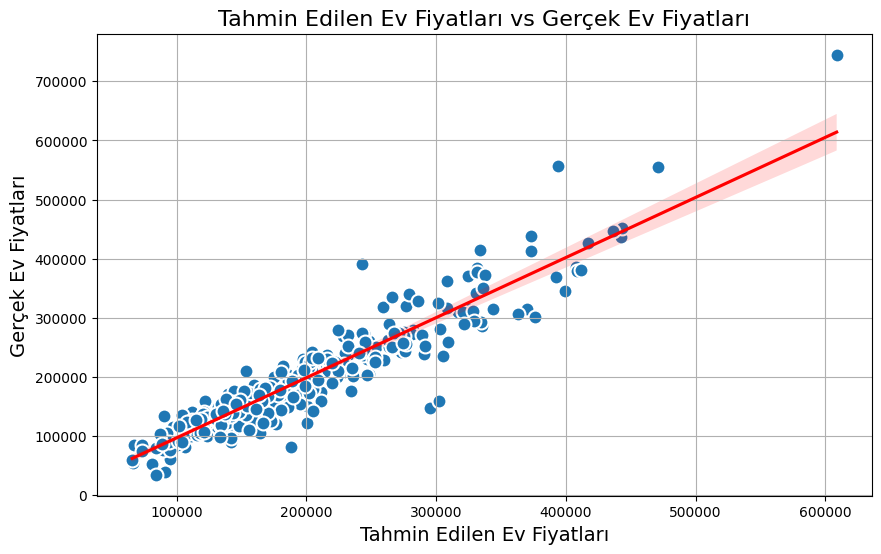

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred.flatten(), y=y_test.values.flatten(), s=100, edgecolor='w', linewidth=1.5)
sns.regplot(x=pred.flatten(), y=y_test.values.flatten(), scatter=False, color='red')

plt.title('Tahmin Edilen Ev Fiyatları vs Gerçek Ev Fiyatları', fontsize=16)
plt.xlabel('Tahmin Edilen Ev Fiyatları', fontsize=14)
plt.ylabel('Gerçek Ev Fiyatları', fontsize=14)
plt.grid(True)
plt.show()


----------

#### Label Encoder, kategorik değişkenlerin sıralı olduğu varsayımını yapar. Örneğin, "Düşük", "Orta", "Yüksek" sınıfları için 0, 1, 2 değerleri anlamlı bir sıralama ifade eder.

#### One-Hot Encoder, kategorik değişkenlerin sıralı olmadığı varsayımı ile çalışır. Her sınıf, birbirinden bağımsız olarak temsil edilir.

##  Boş olan datayı doldurma

In [190]:
new=df_null_price.drop('SalePrice',axis=1)

x=df_not_null.drop('SalePrice',axis=1)
y=df_not_null[['SalePrice']]

In [193]:
x.shape,new.shape

((1412, 254), (1393, 254))

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x,y)

GradientBoostingRegressor()

In [199]:
tahmini_fiyatlar=gb.predict(new)
df_null_price['Predic_SalePrice']=tahmini_fiyatlar

In [200]:
df_null_price.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Predic_SalePrice
1460,1461,20,80.0,1

# Deep Learning

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


x=df_not_null.drop(['Id','SalePrice'],axis=1)
y=df_not_null[['SalePrice']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)



scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regresyon için linear aktivasyon fonksiyonu
model.compile(optimizer='adam', loss='mse')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 38407659520.0000 - val_loss: 39997485056.0000
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38955298816.0000 - val_loss: 39931318272.0000
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39903125504.0000 - val_loss: 39556780032.0000
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39313137664.0000 - val_loss: 38224723968.0000
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35962568704.0000 - val_loss: 34909540352.0000
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32231413760.0000 - val_loss: 28614113280.0000
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25298628608.0000 - val_loss: 19820900352.0000
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16589763584.0000 - val_loss: 11407519744.0000
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10099996672.0000 - val_loss: 7101661696.0000
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1681722752.0000 
Test Seti Kayıp (MSE): 1629846656.0
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Ortalama Kare Hatası (MSE): 1629846504.4361854


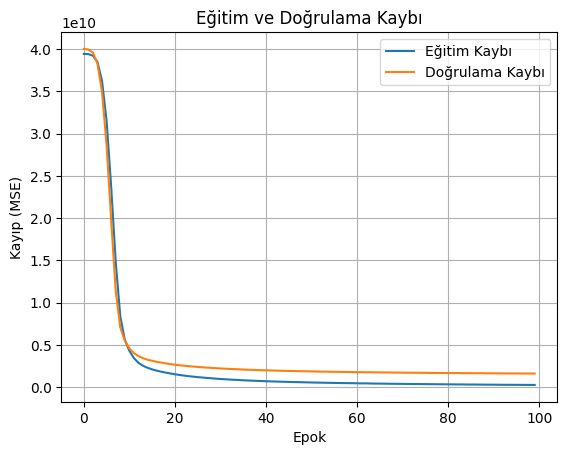

In [208]:
test_loss = model.evaluate(x_test, y_test)
print(f"Test Seti Kayıp (MSE): {test_loss}")

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print(f"Ortalama Kare Hatası (MSE): {mse}")

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epok')
plt.ylabel('Kayıp (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [210]:
r2_score(y_test, model.predict(x_test))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.7664418630020324

 Sonuç olarak Algo_test ile modelimizin R^2 değerini 88 bulduk bu değeri yeterli ve boş  SalePrice Değeri boş olan datamıza yeni değerler Başarı oranı yüksek modelimizle yeni değerler ekledik